# Report 1 (mid-semester) - Exploratory Data Analysis on IMDB dataset

Project contains: **Data cleaning || EDA || Hypotheses testing (on the overall aim) || Actionable recommendations based on this analysis**

In [1]:
#standard imports for when working with pandas
import numpy as np

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr

%matplotlib inline
# rcParams['figure.figsize'] = 12,5
plt.style.use('seaborn-whitegrid')

In [2]:
#Loading The Dataset
myfile = 'movie_metadata.csv'
#read the movie metadata file into a dataframe in pandas
df_raw = pd.read_csv(myfile,index_col=None)
#To display first 5 rows of our dataframe
df_raw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 1.0 Data preparation and cleaning (fix, replace, drop) of values

In [3]:
# To see the dimensionality of the dataframe
df_raw.shape

(5043, 28)

In [4]:
# Inspect dataframe for variable type
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

#### 1.1 Visualizing missing values in the dataset

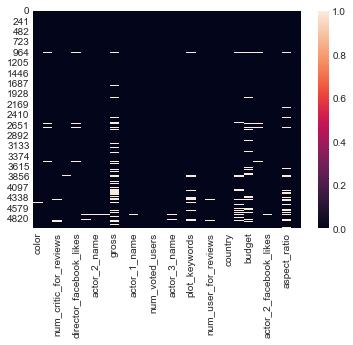

In [5]:
sns.heatmap(df_raw.isnull())
plt.show()

The heatmap shows a high number of missing values particularly in the 'gross' and 'budget' columns

#### 1.2 Dropping unused columns, Dropping null / empty entries and Replacing empty entries

In [6]:
#Dropping columns
df=df_raw.drop(['facenumber_in_poster', 'plot_keywords','movie_imdb_link', 'director_facebook_likes', 
            'aspect_ratio', 'color', 'content_rating', 'cast_total_facebook_likes', 'movie_facebook_likes',
               'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'actor_3_name',
               'actor_2_facebook_likes'],axis=1)

#Replace 0 to NaN
df.replace(0,np.nan, inplace=True) 

In [7]:
df.shape

(5043, 14)

#### Checking for duplicate data

In [8]:
duplicate_df = df.duplicated().any()
duplicate_df

True

In [9]:
# Dropping duplicates
df=df.drop_duplicates()

In [10]:
# Dropping all rows housing columns with NAN greater than 1 percent

round(df.isnull().sum().sort_values(ascending=False)/len(df) * 100,2)

gross                     17.47
budget                     9.73
title_year                 2.14
director_name              2.06
num_critic_for_reviews     0.98
num_user_for_reviews       0.42
duration                   0.30
language                   0.24
actor_1_name               0.14
country                    0.10
genres                     0.00
movie_title                0.00
num_voted_users            0.00
imdb_score                 0.00
dtype: float64

In [11]:
df = df[df['gross'].notnull()]
df = df[df['budget'].notnull()]
df = df[df['director_name'].notnull()]
df = df[df['title_year'].notnull()]
df = df[df['num_critic_for_reviews'].notnull()]
df = df[df['duration'].notnull()]

#### Fill NAN values on the Language column

In [12]:
df.language.describe()

count        3851
unique         38
top       English
freq         3671
Name: language, dtype: object

On inspection, it is obvious the NAN values can safely be replaced with english

In [13]:
df.language = df.language.fillna('English')

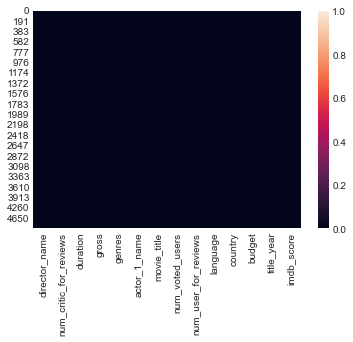

In [14]:
sns.heatmap(df.isnull())
plt.show()

Heatmap for the dataframe with all null values removed

In [15]:
#Rechecking the respective columns null percentages
round(df.isnull().sum().sort_values(ascending=False)/len(df) * 100,2)

actor_1_name              0.08
director_name             0.00
num_critic_for_reviews    0.00
duration                  0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
country                   0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
dtype: float64

#### Relabeling and reordering columns - to ensure proper spacing

In [16]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'country', 'budget', 'title_year',
       'imdb_score'],
      dtype='object')

In [17]:
# Relabeling colunmn headers to eliminate bad spacing:
df.columns = ['director_name', 'num_critic_for_reviews', 'duration', 'gross', 'genres', 
              'actor_1', 'movie_title', 'num_voted_users', 'num_user_for_reviews', 
              'language', 'country', 'budget', 'title_year', 'imdb_score']

In [18]:
# Rearranging/reordering the columns
df = df[['movie_title', 'title_year', 'genres', 'duration', 'director_name', 'actor_1', 
         'country', 'budget', 'gross', 'imdb_score', 'language', 
         'num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews']]
df.head()

,movie_title,title_year,genres,duration,director_name,actor_1,country,budget,gross,imdb_score,language,num_voted_users,num_critic_for_reviews,num_user_for_reviews
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,James Cameron,CCH Pounder,USA,237000000.0,760505847.0,7.9,English,886204,723.0,3054.0
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,169.0,Gore Verbinski,Johnny Depp,USA,300000000.0,309404152.0,7.1,English,471220,302.0,1238.0
2,Spectre,2015.0,Action|Adventure|Thriller,148.0,Sam Mendes,Christoph Waltz,UK,245000000.0,200074175.0,6.8,English,275868,602.0,994.0
3,The Dark Knight Rises,2012.0,Action|Thriller,164.0,Christopher Nolan,Tom Hardy,USA,250000000.0,448130642.0,8.5,English,1144337,813.0,2701.0
5,John Carter,2012.0,Action|Adventure|Sci-Fi,132.0,Andrew Stanton,Daryl Sabara,USA,263700000.0,73058679.0,6.6,English,212204,462.0,738.0


In [19]:
df.shape

(3854, 14)

#### Checking the percentage of data retained after completeing the above steps

In [20]:
len(df)/len(df_raw) * 100

76.42276422764228

After the cleaning processes above, we ratined about 76 percent of our rows.

### Creating a column for profit and Splitting  data to two parts for EDA and Hypothesis testing

Convert the unit of the budget and gross column from £ to million £

In [21]:
df['budget'] = df['budget']/1000000
df['gross'] = df['gross']/1000000

Create a new column called 'profit' which equals 'gross' minus 'budget'

In [22]:
# Create a new column called 'profit' (last column) which equals 'gross' minus 'budget'
df['profit'] = df['gross'] - df['budget']

#### Splitting my data to two parts 
Dataframe is split to two parts, one for Exploratory Data Analysis (EDA) and the other for Hypothesis testing

In [23]:
# The two data parts are called 'df_eda' and 'df_hyptst' respectively
df_eda=df.sample(frac=0.5, random_state=1)
df_hyptst=df.drop(df_eda.index)

## 2.0 Exploratory Data Analysis And Visualizations
Examining the data, to see if we can find any interesting statistics and observations

#### 2.1 Overall statistics of the dataframe

In [24]:
round(df_eda.describe(),4)

,title_year,duration,budget,gross,imdb_score,num_voted_users,num_critic_for_reviews,num_user_for_reviews,profit
count,1927.0000,1927.0000,1927.0000,1927.0000,1927.0000,1.927000e+03,1927.0000,1927.0000,1927.0000
mean,2003.1028,110.0353,50.7477,51.3695,6.4387,1.033598e+05,161.7032,323.5963,0.6218
std,10.1355,22.6343,306.3627,69.6813,1.0652,1.541024e+05,122.0620,412.4237,309.9530
min,1927.0000,37.0000,0.0002,0.0007,1.9000,2.700000e+01,1.0000,1.0000,-12213.2986
25%,1999.0000,95.0000,10.0000,6.9992,5.9000,1.778350e+04,72.0000,102.0000,-11.0569
50%,2005.0000,106.0000,25.0000,28.5639,6.5000,5.134900e+04,135.0000,199.0000,0.5303
75%,2010.0000,120.0000,50.0000,65.6384,7.2000,1.237465e+05,220.0000,388.0000,24.4667
max,2016.0000,330.0000,12215.5000,652.1773,9.0000,1.676169e+06,813.0000,5060.0000,502.1773


Here, we are dealing with data from 1927 to 2016. We also see the minimum and maximum values for budget, gross, imdb_score amongst other values.

#### Parametric Correlation Analysis

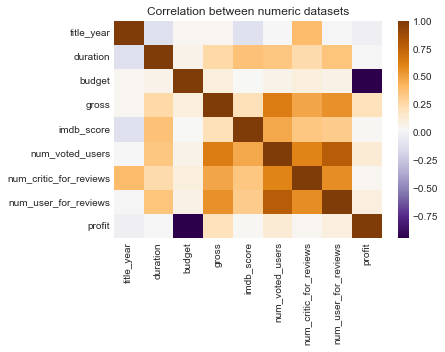

In [25]:
sns.heatmap(df.corr(), cmap='PuOr_r')
plt.title("Correlation between numeric datasets")
plt.show()

This correlation chart shows an overview in the relationship between variables in our dataset. Making comparison between this four categories - budget, profit, gross and imdb_score. We see no correlation between all four variables, except for Budget and Profit which shows a highly negative correlation (>-0.95)

#### Visualizing this high negative correlating between budget vs Profit

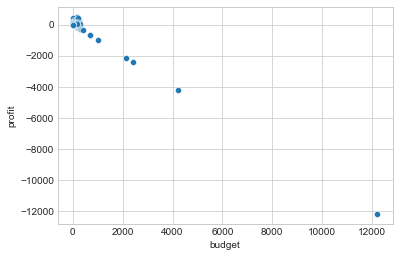

In [26]:
# Visualizing the newly constructed dataframe (top_profiting150)
sns.scatterplot(x='budget', y='profit', data=df_eda)
plt.show()

Clearly, the data skewes to the left. The trend here corroborates the high negative correlation between budget on a movie and profit made. This corresponds with the results from the pearson correlation.

In [27]:
top_profiting15 = df_eda.nlargest(15, 'profit')[['movie_title', 'director_name', 'profit', 'imdb_score', 'budget']].set_index('movie_title')
top_profiting15

,director_name,profit,imdb_score,budget
movie_title,,,,
Jurassic World,Colin Trevorrow,502.177271,7.0,150.0
Star Wars: Episode IV - A New Hope,George Lucas,449.935665,8.7,11.0
The Avengers,Joss Whedon,403.279547,8.1,220.0
Star Wars: Episode I - The Phantom Menace,George Lucas,359.544677,6.5,115.0
The Dark Knight,Christopher Nolan,348.316061,9.0,185.0
Deadpool,Tim Miller,305.024263,8.1,58.0
The Hunger Games: Catching Fire,Francis Lawrence,294.645577,7.6,130.0
Despicable Me 2,Pierre Coffin,292.049635,7.5,76.0
American Sniper,Clint Eastwood,291.323553,7.3,58.8


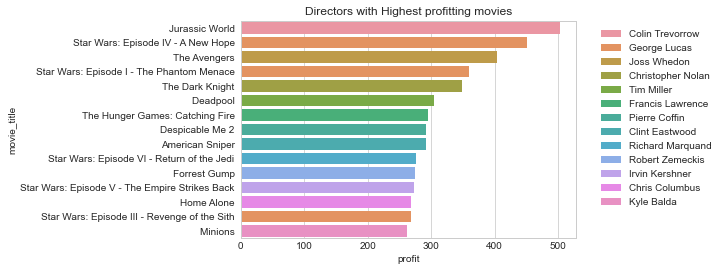

In [28]:
# Visualizing the newly constructed dataframe (top_profiting15)
sns.barplot(x='profit', y=top_profiting15.index, data=top_profiting15, hue='director_name', dodge=False)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.title("Directors with Highest profitting movies")
plt.show()

Despite the no correlation established earlier between **profit** and **imdb_score** this table above for top 15 profiting movies suggest a mean imdb_score of 7.8. This implies that on average, the good profiting movies should have an imdb_score greater than 7.

Of the top 15 most profitable movies, three movies by George Lucas took positions 2, 5 and 13, averaging an imdb_score of 7.6. This, may be suggestive of some sort of influence by this directors on movie profitability and rating.

#### Finding movies with negative profit

In [29]:
negative_profit = df_eda[df_eda['profit'] < 0]
negative_profit.reset_index(drop=True)

#Top 5 movies that incured losses
negative_profit.sort_values(by='profit')[0:5]

,movie_title,title_year,genres,duration,director_name,actor_1,country,budget,gross,imdb_score,language,num_voted_users,num_critic_for_reviews,num_user_for_reviews,profit
2988,The Host,2006.0,Comedy|Drama|Horror|Sci-Fi,110.0,Joon-ho Bong,Doona Bae,South Korea,12215.500000,2.201412,7.0,Korean,68883,363.0,279.0,-12213.298588
3859,Lady Vengeance,2005.0,Crime|Drama,112.0,Chan-wook Park,Min-sik Choi,South Korea,4200.000000,0.211667,7.7,Korean,53508,202.0,131.0,-4199.788333
2323,Princess Mononoke,1997.0,Adventure|Animation|Fantasy,134.0,Hayao Miyazaki,Minnie Driver,Japan,2400.000000,2.298191,8.4,Japanese,221552,174.0,570.0,-2397.701809
2334,Steamboy,2004.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,103.0,Katsuhiro Ôtomo,William Hootkins,Japan,2127.519898,0.410388,6.9,Japanese,13727,105.0,79.0,-2127.109510
4542,Godzilla 2000,1999.0,Action|Adventure|Drama|Sci-Fi|Thriller,99.0,Takao Okawara,Hiroshi Abe,Japan,1000.000000,10.037390,6.0,Japanese,5442,107.0,140.0,-989.962610


The highest losses were recorded for foreign_movies

#### Using a histogram to have an overview of imdb_score distribution for all movie

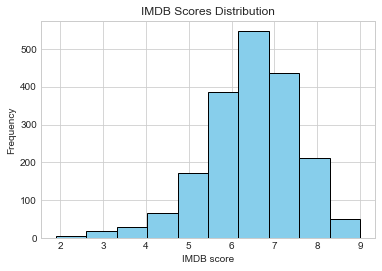

In [30]:
plt.title("IMDB Scores Distribution") #setting the title of the plot
plt.xlabel('IMDB score') # setting the x label of the plot
plt.ylabel('Frequency') # setting the y label of the plot
plt.hist(df_eda['imdb_score'], color="skyblue", edgecolor='black'); # plotting the points on the histogram

The result from the histogram shows that most of the films’ IMDB scores lie around 6.3–7.0

#### 2.4 Let's find top 250 imdb_score 
The top 250 movies with the greatest imdb_score should be stored in a new dataframe called "imdb_top250."
- Additionally, we confirm that the num_voted_users for each of these films exceeds 25000.
- Add a rank column as well, with values reflecting the positions of the corresponding movies from 1 to 250.

In a separate dataframe called "top_nonEng_movies," extract all the imdb top250 dataframe movies that aren't in English.

In [31]:
imdb_top250 = df[df['num_voted_users'] > 25000].set_index('movie_title').sort_values(by='imdb_score', ascending=False).head(250)
imdb_top250['rank']= imdb_top250['imdb_score'].rank(method='first', ascending=False)
imdb_top250.head()

,title_year,genres,duration,director_name,actor_1,country,budget,gross,imdb_score,language,num_voted_users,num_critic_for_reviews,num_user_for_reviews,profit,rank
movie_title,,,,,,,,,,,,,,,
The Shawshank Redemption,1994.0,Crime|Drama,142.0,Frank Darabont,Morgan Freeman,USA,25.0,28.341469,9.3,English,1689764,199.0,4144.0,3.341469,1.0
The Godfather,1972.0,Crime|Drama,175.0,Francis Ford Coppola,Al Pacino,USA,6.0,134.821952,9.2,English,1155770,208.0,2238.0,128.821952,2.0
The Godfather: Part II,1974.0,Crime|Drama,220.0,Francis Ford Coppola,Robert De Niro,USA,13.0,57.300000,9.0,English,790926,149.0,650.0,44.300000,3.0
The Dark Knight,2008.0,Action|Crime|Drama|Thriller,152.0,Christopher Nolan,Christian Bale,USA,185.0,533.316061,9.0,English,1676169,645.0,4667.0,348.316061,4.0
"The Good, the Bad and the Ugly",1966.0,Western,142.0,Sergio Leone,Clint Eastwood,Italy,1.2,6.100000,8.9,Italian,503509,181.0,780.0,4.900000,5.0


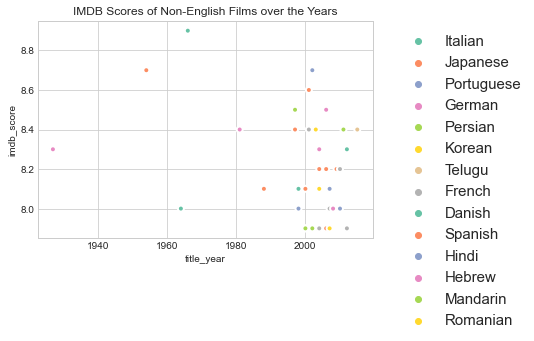

In [32]:
#### Extracting the foreign movies amongst the top 250
top_nonEng_movies = imdb_top250[imdb_top250['language']!='English']

sns.scatterplot(data=top_nonEng_movies, x=top_nonEng_movies["title_year"], y=top_nonEng_movies['imdb_score'], hue=top_nonEng_movies["language"], ci=None,linewidth = 2, palette="Set2")
plt.title("IMDB Scores of Non-English Films over the Years")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, prop={'size': 15})
plt.show()

In [33]:
top_nonEng_movies.shape

(38, 15)

Here, we see how different foreign movies fared in terms of the imdb_score. An Italian movie ranked highest followed by a Japanees movie. However, it is worthy to keep in mind that interms of losses made (negative profit extrapolated earlier), foreign movies dominated the top 5 (for which Japanees movies were at number 2 and 3).

#### Comparing movie profits and rating (imdb_score) with year 

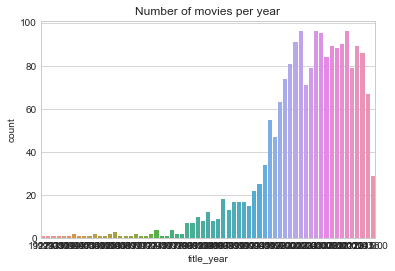

In [34]:
# Display the number of movies made per year
df_eda['title_year'].value_counts()
sns.countplot(x='title_year', data=df_eda)
plt.title('Number of movies per year')
plt.show()

In [35]:
# Find average profit and rating (imdb_score) of movies per year
df_eda.groupby('title_year')['profit', 'imdb_score'].mean().sort_values(by= 'profit', ascending=False).head()

C:\Users\User\AppData\Local\Temp/ipykernel_10976/1101272068.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_eda.groupby('title_year')['profit', 'imdb_score'].mean().sort_values(by= 'profit', ascending=False).head()


,profit,imdb_score
title_year,,
1973.0,155.394000,7.750
1977.0,124.883916,7.375
1976.0,116.275247,8.100
1975.0,107.600000,8.700
1969.0,96.308900,8.100


In [36]:
# In which year was there the highest average voting
df_eda.groupby('title_year')['num_voted_users'].mean().sort_values(ascending=False).head()

title_year
1975.0    680041.0
1968.0    427357.0
1960.0    422432.0
1976.0    375240.0
1939.0    291875.0
Name: num_voted_users, dtype: float64

Quite a few movies were produced in the 90's, and a vast majority of those few movies were highly rated and saw a huge voting by users. Compared to movie production in the 2000's, whcih have seen an upward surge, however on average, the yearly ratings of movie appears to be much lower than the 90's.

#### 2.6 Let's evaluate the genres
Using a bar chart we see the different types genres for the movies in our dataset

In [37]:
# first, to know the number of unique categories under the genres column,
df_eda['genres'].nunique()

519

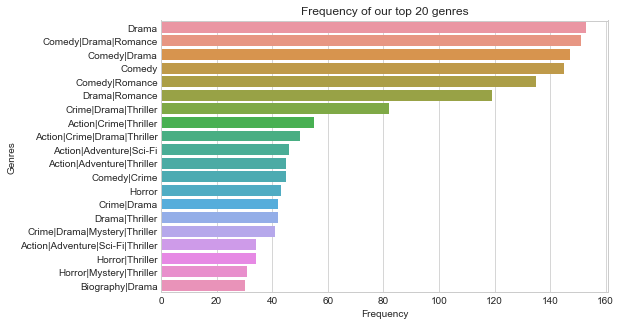

In [38]:
# drawing the bar plot for the genre column
# grouping the dataframe by "genres" column and then counting each category and displaying the first 20 genres 
# with the largest count
y=df.groupby("genres")['genres'].count().nlargest(20)
x = y.index #the index(row labels) of the dataframe
 
plt.figure(figsize=(8,5))
ax = sns.barplot(x= y, y = x)
ax.set(xlabel = 'Frequency') 
ax.set(title = 'Frequency of our top 20 genres') 
ax.set(ylabel = 'Genres') 

plt.show()

From the chart above, most of the data from our dataframe (df_eda) were in the Comedy|Drama|Romance genre.

### 2.4.1 Find the most profiting movie genres within our budget (£1.5 million) that retained a high imdb_score
To examine if any of these good film genres can be made within our budget, I filtered by a maximum 1500 000 and looked at the profit.

From our earlier results, where we established a relationship of top profiting movies having and imdb_score of at least 7. Furthermore we will set our minimum profit to be above 0 (positive).

In [39]:
#set the maximum possible budget to £1500 000 i.e. £1.5 million

max_budget = 1.5
min_profit = 0 #max_budget * 0.5
min_imdb_score=7

pop_genres=df_eda.groupby('genres')[['imdb_score','budget', 'profit']].mean()
#find the details of films with less than the maximum budget
budget_genres = pop_genres[pop_genres['budget']<max_budget]
budget_genres = budget_genres.sort_values('profit',ascending=False)
#find the details of films with less than the maximum budget but greater than minimum profit
budget_genres=budget_genres[budget_genres['profit']>=min_profit]
#find the details of films with less than the maximum budget but greater than minimum profit and imdb_score
budget_genres=budget_genres[budget_genres['imdb_score']>=min_imdb_score]
#Create a new 'rank' column
budget_genres['rank']=budget_genres['profit'].rank(method='first', ascending=False)
budget_genres

,imdb_score,budget,profit,rank
genres,,,,
Documentary|History|Music,7.8,0.400000,6.357593,1.0
Action|Drama|Western,8.0,0.200000,3.300000,2.0
Biography|Crime|Documentary|History|Thriller,7.8,1.000000,1.957978,3.0
Biography|Documentary,7.2,0.000218,0.591796,4.0


The result shows some well-rated genres identified within our budget that we could propose as better options to make good rated and highly profiting films.

However, taking a closer look at the details from the top three genre ranking that met our criteria (of budget, profit and imdb_score), we can see that there is actually only one in rank 1 (Biography|Comedy|Drama|Romance), three films in rank 2 (Crime|Drama|Romance), only one movie in rank 3 (Biography|Documentary|Sport) and only one film in rank 4 (Documentary|History|Music).

**Based on the number of films meeting this criteria, the inferences we can draw from this particular comparison are weak. Hence, let's drop the imbd_score criteria and look solely at profit to budget**

#### 2.6.1 Find the most profiting combination of genres 
Asumming, of the genre set for each movie (separated by pipes (|)) only the first 2 are significant for any movie:
- Let's extract the first two genres from the genre column and store them in two new columns - genre_1 and genre_2. Where a movie has only one genre, we extract the single genre into both columns, i.e. for such movies genre_1 = genre_2
- Find out the most profiting combo of genres and store them in a new dataframe named **'prof_genre_combo'**

In [40]:
df_budget=df_eda[df_eda['budget']<=1.5]
TempGenre = df_budget.genres.str.split('|',expand=True).iloc[:,0:2]
TempGenre.columns = ['genre_1', 'genre_2']
TempGenre.genre_2.fillna(TempGenre.genre_1, inplace=True)

#Combining the new genre columns with the df_eda dataframe
df_eda_budget = pd.concat([df_eda,TempGenre], axis=1)

In [41]:
prof_genre_combo = df_eda_budget.groupby(['genre_1', 'genre_2']).profit.mean().sort_values(ascending=False).head(5)
prof_genre_combo

genre_1    genre_2 
Drama      Sport       58.967601
Adventure  Family      39.052600
Horror     Horror      34.681165
           Thriller    30.775468
           Mystery     22.051994
Name: profit, dtype: float64

In [42]:
df_budget.nlargest(10,'profit')[['movie_title','genres','budget','profit',]].set_index('movie_title')

,genres,budget,profit
movie_title,,,
The Blair Witch Project,Horror,0.060000,140.470114
Rocky,Drama|Sport,0.960000,116.275247
American Graffiti,Comedy|Drama|Music,0.777000,114.223000
Napoleon Dynamite,Comedy,0.400000,44.140956
Benji,Adventure|Family|Romance,0.500000,39.052600
Fireproof,Drama|Romance,0.500000,32.951479
Psycho,Horror|Mystery|Thriller,0.806947,31.193053
The Texas Chain Saw Massacre,Horror|Thriller,0.083532,30.775468
Sling Blade,Drama,0.890000,23.585416


Six of the ten highest profitting movies meeting our budget criteria, all had horror in their genre. Thus a deeper look at the movies in the horror genre is shown below.

In [43]:
df_eda_horror=df_budget[df_budget['genres'].str.contains('Horror',case=False)]
df_eda_horror.reset_index(drop=True,inplace=True)
df_eda_horror

,movie_title,title_year,genres,duration,director_name,actor_1,country,budget,gross,imdb_score,language,num_voted_users,num_critic_for_reviews,num_user_for_reviews,profit
0,Stake Land,2010.0,Drama|Horror|Sci-Fi,98.0,Jim Mickle,Connor Paolo,USA,0.650000,0.018469,6.5,English,34263,215.0,141.0,-0.631531
1,Rubber,2010.0,Comedy|Fantasy|Horror,82.0,Quentin Dupieux,Haley Ramm,France,0.500000,0.098017,5.8,English,26185,230.0,170.0,-0.401983
2,Detention of the Dead,2012.0,Comedy|Horror,87.0,Alex Craig Mann,Justin Chon,USA,0.500000,0.001332,4.6,English,2038,29.0,20.0,-0.498668
3,Prison,1987.0,Crime|Drama|Horror|Thriller,102.0,Renny Harlin,Viggo Mortensen,USA,1.300000,0.354704,5.9,English,2705,68.0,38.0,-0.945296
4,Dead Snow,2009.0,Comedy|Horror,91.0,Tommy Wirkola,Bjørn Sundquist,Norway,0.800000,0.041709,6.4,Norwegian,54601,224.0,200.0,-0.758291
5,Pontypool,2008.0,Fantasy|Horror,95.0,Bruce McDonald,Stephen McHattie,Canada,1.500000,0.003478,6.7,English,22212,178.0,142.0,-1.496522
6,Incident at Loch Ness,2004.0,Adventure|Comedy|Horror,94.0,Zak Penn,Zak Penn,UK,1.400000,0.036830,6.6,English,3291,60.0,63.0,-1.363170
7,The Beyond,1981.0,Horror,82.0,Lucio Fulci,Catriona MacColl,Italy,0.400000,0.126387,6.9,Italian,14985,203.0,253.0,-0.273613
8,Psycho,1960.0,Horror|Mystery|Thriller,108.0,Alfred Hitchcock,Janet Leigh,USA,0.806947,32.000000,8.5,English,422432,290.0,1040.0,31.193053
9,The Blair Witch Project,1999.0,Horror,81.0,Daniel Myrick,Heather Donahue,USA,0.060000,140.530114,6.4,English,186786,360.0,3400.0,140.470114


We've been able to narrow down to about 19 horror movies meeting our budget and profit criteria.

## Hypothesis testing

**Making a movie in the Horror genre category could be profitable**

Hypothesis:
If there is a direct proportionality between profit and the genre of movie, then making a horror movie within the £1.5 million budget will be most profitable.

Independent Variable = Profit

Dependent Variable = Horror (Genre)

**Null hypothesis ( 𝐻0 ):** horror movies with a budget of £1.5 million would only make a profit of £10 million or less.

**Alternative hypothesis ( 𝐻1 ):** horror movies with a budget of £1.5 million would make a profit of greater than £5 million.

Using a predetermined significance level = 0.05%

In [44]:
#Filtering the hypothesis data with my budget criteria
df_horror = df_hyptst[(df_hyptst['genres'].str.contains('Horror',case=False, na=False)) & (df_hyptst.budget<1.5)]

In [45]:
# Sample mean for profit of horror films
avg_horror = df_horror.profit.mean()
avg_horror

22.428132478260864

In [46]:
# Sample standard deviation from the profit data of horror movies
std_horror = df_horror.profit.std()
std_horror

26.13593329938784

In [47]:
#Count of horror movies made within £1.5 million
horror_count = df_horror['profit'].count()
horror_count

23

In [48]:
# Adopting the t-test (giving a sample size less than 30),
population_mean=10
t_value = (avg_horror - population_mean)/(std_horror/np.sqrt(horror_count - 1))
t_value

2.2303817420047336

In [49]:
from scipy import stats
p_value = 1-stats.t.cdf(t_value, horror_count)
p_value

0.01788280746150428

In [50]:
print("The average budget of horror films made within a budget of £1.5 million is ",df_horror['budget'].mean())
print("And the corresponding p-value from the t test is: ",p_value)

The average budget of horror films made within a budget of £1.5 million is  0.6234144347826086
And the corresponding p-value from the t test is:  0.01788280746150428


In [51]:
# To calculate the confidence interval
import scipy.stats as st
st.t.interval(alpha=0.95, df=len(df_horror.profit)-1,loc=np.mean(df_horror.profit), scale=st.sem(df_horror.profit))

(11.12610739446565, 33.73015756205608)

My sample mean of 22.42 falls between this CI

# Summary

The main objective of this project was to find relevant movie genres fitting my budget criteria of less than 1.5 million GBP while keeping profits as an integral part of my analysis. To achieve this, I examined the imdb dataset provided.

**What was done:**
* **Data cleaning:** 
- involved dropping unused columns, dropping null entries and replacing empty entries (where necessary)
- As preparation for our analysis, we introduced a profit column and went on to split the dataset (for EDA and hypothsis testing)
* **EDA:**
- we obtained the descriptive stats of the numeric varibles, ran a parametric correlation to get an overview, found the movies with highest profits and the associated director, top 250 movies with the highest imdb_score, years with highest profits/rating, top genres in terms of frequency, attempt to find the most profiting movie genres within our budget (£1.5 million) that made good profit and retained a high imdb_score, finding the most profiting combination of genres with the aim of extracting the most frequently occuring that meets our budget criteria.

**What was found:**
1. After the cleaning process, we retained over 76% of our rows and dropped about 50% of the columns (which were unused)
2. The majority of the films have IMDB ratings ranging from 6.3 to 7.1.
3. No correlation between gross, budget, profit and imdb_score. 
4. Budget and profit showed a highly negative correlation (>0.95).
5. Directors that racked in good profits (top 15 directors) worked with at least 5 times our proposed budget
6. imdb_score (movie rating) could not be satisfactorily used in classifying genre profitability within our available budget
7. English is the most commonly used language in these films dataset.
8. The most profitable genre of movie within our budget is the horror genre.


From my hypothesis testing, with a p-value of 0.017 lesser than the predetermined significance level of 0.05, the null hypothesis can be rejected since there is a less than 5% chance that it would be true. The alternative hypothesis, according to which horror movies made a profit above £10 million on the £1.5 million budget can therefore be accepted.

Based on the data analyses, I could recommend that the studio pursue making a film in the Horror genre. 

In [2]:
import io
from nbformat import current

#filepath="/content/drive/My Drive/NLE Notebooks/assessment/assignment1.ipynb"
filepath="DSRM_Assignment2.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 912
